In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%run ../src/acc_clusters

In [3]:
original_acc_data = pd.read_csv('../data/cleaned/coll_coord.csv', low_memory=False)

In [4]:
sample_min = 100
x = np.arange(0.001,0.00001,-0.00001)

In [5]:
mcl = [Ac_cluster(original_acc_data, 300000, eps=eps, min_samples=sample_min) for eps in x]

In [29]:
cl_counts = [mc.cluster_counts['point'].sum() for mc in mcl]

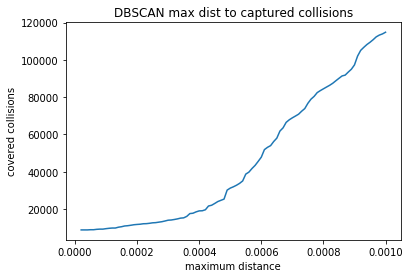

In [35]:
plt.plot(x,cl_counts)
plt.xlabel("maximum distance")
plt.ylabel("covered collisions")
plt.title('DBSCAN max dist to captured collisions')
plt.savefig('../images_part2/dbscan_dist_var_coll.png')

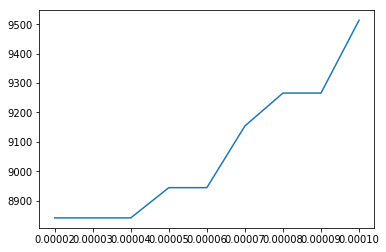

In [8]:
plt.plot(x[90:],cl_counts[90:])

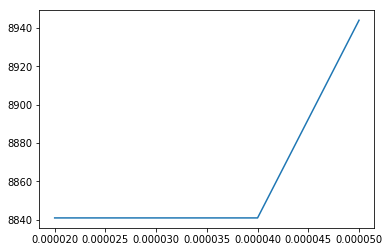

In [9]:
plt.plot(x[95:],cl_counts[95:])

## Now let's look into the number of clusters:

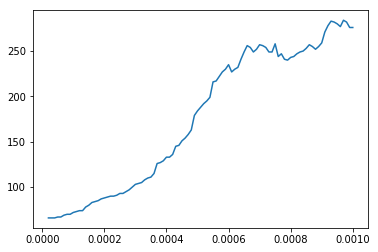

In [10]:
cl_nrs = [len(mc.cluster_counts) for mc in mcl]
plt.plot(x,cl_nrs)

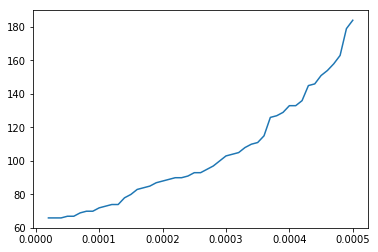

In [11]:
plt.plot(x[50:],cl_nrs[50:])

In [12]:
len(cl_nrs)

99

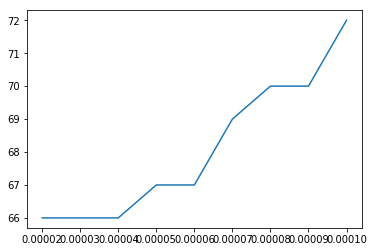

In [13]:
plt.plot(x[90:],cl_nrs[90:])

------------

In [14]:
x, y = mcl[98].get_clusters_head(100)

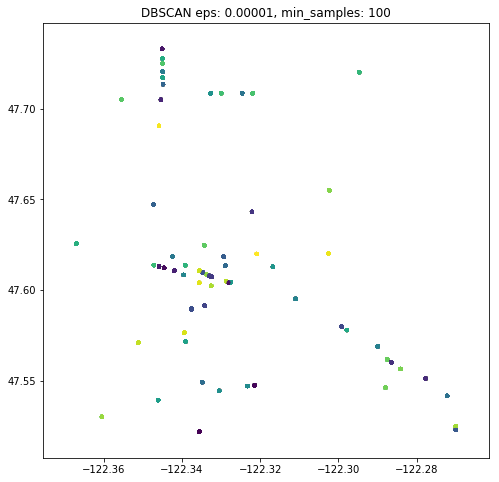

In [20]:

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x[:,0],x[:,1],c=y,marker='.')

plt.title('DBSCAN eps: 0.00001, min_samples: 100')
plt.savefig('../images_part2/dbscan_00001_100.png')

In [36]:
mcl[98].cluster_counts.head()

,point
cluster,
33,291
38,267
47,254
3,252
14,242


In [22]:
x[y==33][:3]

array([[-122.33265538,   47.70865452],
       [-122.33265538,   47.70865452],
       [-122.33265538,   47.70865452]])

### Distance
At a latidude of 47 degrees, a difference in coordinates of 0.0001 represents a distance of 12m. 

(See https://gps-coordinates.org/distance-between-coordinates.php )

We can certainly assume that everything closer than 6m is practically the same adress.

Consistent with this, we see in our data: Below a distance of 0.00005, every cluster represents one point on the coordinate map (one adress). - We don't know how the coordinates were elicited, but our guess is that in most cases they were derived from the address.

To confirm:
- look if the adresses for these "minimal spatial clusters" are also the same
- look if "same address" <=> "same coordinates"
- Are there cases where there is no adress given, but coordinates? (The other way round, there are cases in the filtered-out data with no coordinates)

To add:
- see how many clusters of identical adresses exist in the data (for sample_min less than 100)
- there could be time patters in there (identical adresses with less than 100 cases, but clustered in time. Reasons could be temporary construction sites, or city interventions on places that had collision clustering in a year, e.g *followig* a new construction.)

To do:
    - look into time patterns!